In [1]:
# Install the required libraries
import warnings; 
warnings.simplefilter('ignore')

from IPython.display import clear_output
try:
  !pip install pystan
  !pip install fbprophet
  !pip install alpaca_trade_api
  !pip install yfinance
except:
  print("Error installing libraries")
finally:
  clear_output()
  print("Libraries successfully installed")

Libraries successfully installed


In [2]:
  # Import the required libraries and dependencies
import datetime as dt
from fbprophet import Prophet
import alpaca_trade_api as tradeapi
import yfinance as yf
from datetime import date
%matplotlib inline


Bad key text.latex.preview in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, 

Please enter your stock ticker:  FB


[*********************100%***********************]  1 of 1 completed


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


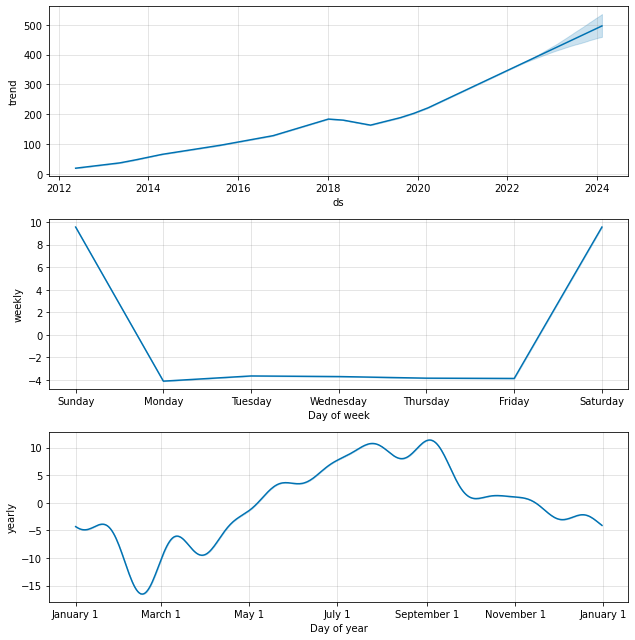

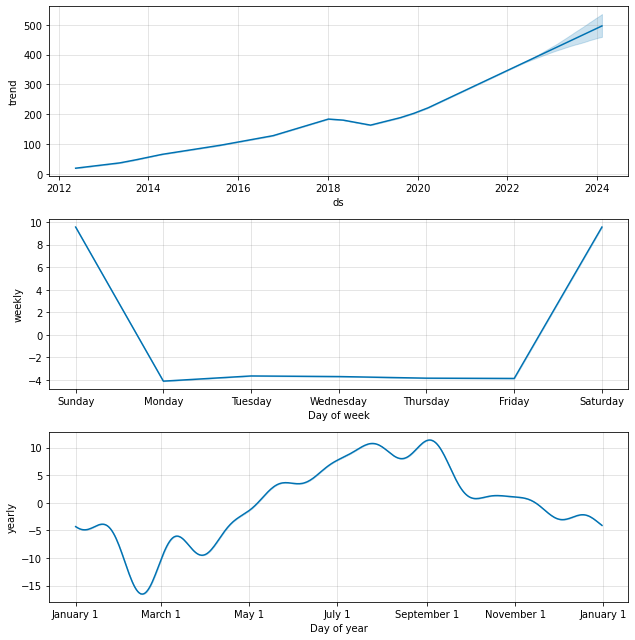

In [3]:
stock = input("Please enter your stock ticker: ")
start = '2012-01-01' 
end = date.today()
data = yf.download(stock, start, end)

data.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)

data=data.reset_index()

data.columns=['ds','y']

model_stock = Prophet()

model_stock.fit(data)

future_stock = model_stock.make_future_dataframe(periods=712, freq='d')

forecast_stock = model_stock.predict(future_stock)

forecast_stock.tail()

#model_stock.plot(forecast_stock)

model_stock.plot_components(forecast_stock)